# BIBLIOTECAS

In [1]:
import warnings
# Desabilitando o FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
import math
import numpy as np
from sklearn.decomposition import PCA
import os
os.environ['OMP_NUM_THREADS'] = '6'  # Defina para o número de threads que você deseja usar

#display all columns and rows
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)


from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,OrdinalEncoder


warnings.filterwarnings('ignore')

# BASE DE DADOS

In [2]:
# Carregar dados 
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')



In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.Age.min()

18

# DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## Traducao

In [7]:
# Dicionário para tradução de colunas
translation_dict = {
    'Age': 'Idade',
    'Attrition': 'Rotatividade',
    'BusinessTravel': 'Viagem de Negócios',
    'DailyRate': 'Taxa Diária',
    'Department': 'Departamento',
    'DistanceFromHome': 'Distância de Casa',
    'Education': 'Educação',
    'EducationField': 'Campo de Educação',
    'EmployeeCount': 'Contagem de Funcionários',
    'EmployeeNumber': 'Número do Funcionário',
    'EnvironmentSatisfaction': 'Satisfação com o Ambiente',
    'Gender': 'Gênero',
    'HourlyRate': 'Taxa Horária',
    'JobInvolvement': 'Envolvimento no Trabalho',
    'JobLevel': 'Nível de Trabalho',
    'JobRole': 'Função',
    'JobSatisfaction': 'Satisfação no Trabalho',
    'MaritalStatus': 'Estado Civil',
    'MonthlyIncome': 'Renda Mensal',
    'MonthlyRate': 'Taxa Mensal',
    'NumCompaniesWorked': 'Número de Empresas Trabalhadas',
    'Over18': 'Maior de 18',
    'OverTime': 'Horas Extras',
    'PercentSalaryHike': 'Aumento Percentual de Salário',
    'PerformanceRating': 'Avaliação de Desempenho',
    'RelationshipSatisfaction': 'Satisfação Relacional',
    'StandardHours': 'Horas Padrão',
    'StockOptionLevel': 'Nível de Opções de Ações',
    'TotalWorkingYears': 'Total de Anos Trabalhados',
    'TrainingTimesLastYear': 'Treinamentos no Último Ano',
    'WorkLifeBalance': 'Equilíbrio entre Vida Profissional e Pessoal',
    'YearsAtCompany': 'Anos na Empresa',
    'YearsInCurrentRole': 'Anos na Função Atual',
    'YearsSinceLastPromotion': 'Anos Desde a Última Promoção',
    'YearsWithCurrManager': 'Anos com o Gerente Atual'
}

# Renomear as colunas do DataFrame
df.rename(columns=translation_dict, inplace=True)


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Taxa Diária,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Distância de Casa,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Educação,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
Contagem de Funcionários,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Número do Funcionário,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
Satisfação com o Ambiente,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
Taxa Horária,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
Envolvimento no Trabalho,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
Nível de Trabalho,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [9]:
#df.describe().T.to_excel("resumo variaveis.xlsx")

In [10]:
# Remover colunas sem variabilidade
columns_to_drop = ['Contagem de Funcionários', 'Número do Funcionário', 'Maior de 18','Horas Padrão']
df.drop(columns=columns_to_drop, inplace=True)

# Listas de variáveis categóricas e contínuas
lista_booleana = ['Rotatividade']  # Rotatividade é categórica, mas representa uma condição booleana.

lista_categoricas = [
    'Viagem de Negócios',
    'Departamento',
    'Educação',
    'Campo de Educação',
    'Satisfação com o Ambiente',
    'Gênero',
    'Envolvimento no Trabalho',
    'Nível de Trabalho',
    'Função',
    'Satisfação no Trabalho',
    'Estado Civil',
    'Horas Extras',
    'Avaliação de Desempenho',
    'Satisfação Relacional',
    'Nível de Opções de Ações',
    'Equilíbrio entre Vida Profissional e Pessoal'
]

lista_continuas = [
    'Idade',
    'Taxa Diária',
    'Distância de Casa',
    'Renda Mensal',
    'Taxa Mensal',
    'Número de Empresas Trabalhadas',
    'Aumento Percentual de Salário',
    'Total de Anos Trabalhados',
    'Anos na Empresa',
    'Anos na Função Atual',
    'Anos Desde a Última Promoção',
    'Anos com o Gerente Atual',
    'Taxa Horária',
    'Treinamentos no Último Ano'
]

# Lista de variáveis discretas (vazia no seu caso)
lista_discretas = []


In [11]:
df.shape

(1470, 31)

In [12]:
def check_missing_values(df):
    """
    Verifica se há valores ausentes em cada coluna do dataframe.
    """
    # Verificar se há valores ausentes em cada coluna
    missing_values = df.isnull().any()

    if missing_values.any():
        print("Colunas com valores ausentes:")
        print(missing_values[missing_values].index.tolist())
    else:
        print("Nenhuma coluna com valores ausentes encontrada.")


def remover_linhas_nulas_e_mostrar_estatisticas(df):
    # Contagem de valores nulos antes da remoção
    nulos_anteriores = df.isnull().sum()

    # Contagem de linhas antes da remoção
    linhas_anteriores = len(df)

    # Remover linhas com valores nulos
    df = df.dropna()

    # Contagem de valores nulos após a remoção
    nulos_apos = df.isnull().sum()

    # Calcular quantos valores não nulos restaram
    nao_nulos = df.notnull().sum()

    # Calcular percentual relativo à remoção
    percentual_remocao = (nulos_anteriores - nulos_apos) / linhas_anteriores * 100

    # Contagem de linhas após a remoção
    linhas_apos = len(df)

    # Calcular percentual de redução de linhas
    percentual_reducao_linhas = (linhas_anteriores - linhas_apos) / linhas_anteriores * 100

    # Calcular quantidade de linhas removidas
    linhas_removidas = linhas_anteriores - linhas_apos

    print (f"linhas removidas {linhas_removidas}, percentual de redução {percentual_reducao_linhas}")

    return df


def remove_outliers_IQR(df, attributes, factor=1.5):
    
    """Funcao para remover outliers com base no IQR
    Parametros:
        - df : dataframe
        - attributes: atributos a considerar na remoção
        - factor: fator do IQR a considerar
    Retorno:
        dataframe com os outliers removidos
    """
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            Q1 = dfn[var].quantile(0.25)
            #Q2 = dfn[var].quantile(0.50)
            Q3 = dfn[var].quantile(0.75)
            IQR = Q3 - Q1
            
            # apenas inliers segundo IQR
            dfn = dfn.loc[(df[var] >= Q1-(IQR*factor)) & (df[var] <= Q3+(IQR*factor)),:]

    return dfn

def remover_outliers(df, colunas):
    df_limpo = df.copy()
    linhas_removidas = {}
    colunas_removidas = []  # Lista para armazenar colunas com remoções
    
    for coluna in colunas:
        p1 = df[coluna].quantile(0.01)
        p99 = df[coluna].quantile(0.99)
        
        condicao = (df_limpo[coluna] >= p1) & (df_limpo[coluna] <= p99)
        linhas_removidas[coluna] = df_limpo.shape[0] - df_limpo[condicao].shape[0]
        
        # Adiciona a coluna à lista se linhas foram removidas
        if linhas_removidas[coluna] > 0:
            colunas_removidas.append(coluna)
        
        df_limpo = df_limpo[condicao]
    
    tamanho_inicial = df.shape[0]
    tamanho_final = df_limpo.shape[0]
    percentual_reducao = (tamanho_inicial - tamanho_final) / tamanho_inicial * 100
    
    return df_limpo, linhas_removidas, percentual_reducao, colunas_removidas



## Chamada das funções
check_missing_values(df)
df=remover_linhas_nulas_e_mostrar_estatisticas(df)


Nenhuma coluna com valores ausentes encontrada.
linhas removidas 0, percentual de redução 0.0


In [13]:
def univariate_analysis(data, lista_booleana, lista_categoricas, lista_discretas, lista_continuas):
    # Juntando apenas as listas que serão convertidas
    listas = lista_booleana + lista_categoricas
    
    # Filtrar apenas as colunas que existem no DataFrame
    colunas_existentes = [col for col in listas if col in data.columns]
    
    # Convertendo apenas colunas booleanas e categóricas para 'category'
    data[colunas_existentes] = data[colunas_existentes].astype('category')

    # Separando variáveis categóricas e numéricas
    categorical_vars = [col for col in data.columns if data[col].dtype in ['object', 'category']]
    
    # Variáveis discretas
    discrete_vars = [col for col in lista_discretas if col in data.columns]

    # Variáveis contínuas
    continuous_vars = [col for col in lista_continuas if col in data.columns]

    # Define a nova paleta de cores
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

    # Plotando gráficos para variáveis categóricas e discretas
    combined_vars = categorical_vars + discrete_vars
    if combined_vars:
        num_plots_combined = len(combined_vars)
        num_rows_combined = math.ceil(num_plots_combined / 3)
        fig_combined, axes_combined = plt.subplots(num_rows_combined, 3, figsize=(18, num_rows_combined * 4))

        for i, column in enumerate(combined_vars):
            row = i // 3
            col = i % 3
            ax = axes_combined[row, col] if num_rows_combined > 1 else axes_combined[col]
            sns.countplot(x=column, data=data, ax=ax, color=colors[i % len(colors)])
            ax.set_title("Distribuição de " + column)
            ax.set_xlabel(column)
            ax.set_ylabel("Quantidade")
            ax.tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

            # Adicionando valores percentuais no centro das barras
            total = float(len(data[column]))
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x() + p.get_width() / 2.,
                        height / 2,
                        '{:.1f}%'.format((height / total) * 100),
                        ha="center")

        # Remove gráficos vazios, se houver
        if num_plots_combined % 3 != 0:
            for j in range(num_plots_combined % 3, 3):
                fig_combined.delaxes(axes_combined[num_rows_combined - 1, j] if num_rows_combined > 1 else axes_combined[j])
       
        
        plt.tight_layout()
        plt.savefig("grafico.png", format="png")
        plt.show()
    

    # Plotando gráficos para variáveis contínuas
    if continuous_vars:
        num_plots_continuous = len(continuous_vars)
        num_rows_continuous = math.ceil(num_plots_continuous / 3)
        fig_continuous, axes_continuous = plt.subplots(num_rows_continuous, 3, figsize=(18, num_rows_continuous * 4))

        for i, column in enumerate(continuous_vars):
            row = i // 3
            col = i % 3
            ax = axes_continuous[row, col] if num_rows_continuous > 1 else axes_continuous[col]
            sns.histplot(data[column], kde=True, ax=ax, color=colors[i % len(colors)])
            ax.set_title("Distribuição de " + column)
            ax.set_xlabel(column)
            ax.set_ylabel("Frequência")

        # Remove gráficos vazios, se houver
        if num_plots_continuous % 3 != 0:
            for j in range(num_plots_continuous % 3, 3):
                fig_continuous.delaxes(axes_continuous[num_rows_continuous - 1, j] if num_rows_continuous > 1 else axes_continuous[j])
        
        
        
        plt.tight_layout()
        plt.savefig("grafico2.png", format="png")
        plt.show()




def plot_boxplots(data, continuous_vars, colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']):
    """
    Plota box plots para variáveis contínuas.

    Args:
    - data (DataFrame): O DataFrame contendo os dados.
    - continuous_vars (list): Lista das variáveis contínuas a serem plotadas.
    - colors (list): Lista de cores para os plots.

    Returns:
    - None
    """
    # Verificando se há variáveis contínuas
    if continuous_vars:
        num_plots_continuous = len(continuous_vars)
        num_rows_continuous = math.ceil(num_plots_continuous / 3)

        # Criando os subplots
        fig_continuous, axes_continuous = plt.subplots(num_rows_continuous, 3, figsize=(18, num_rows_continuous * 4))

        for i, column in enumerate(continuous_vars):
            row = i // 3
            col = i % 3
            ax = axes_continuous[row, col] if num_rows_continuous > 1 else axes_continuous[col]

            # Plotando o box plot
            sns.boxplot(data=data[column], ax=ax, color=colors[i % len(colors)])
            ax.set_title("Box Plot de " + column)
            ax.set_xlabel(column)
            ax.set_ylabel("Valor")

        # Remove gráficos vazios, se houver
        if num_plots_continuous % 3 != 0:
            for j in range(num_plots_continuous % 3, 3):
                fig_continuous.delaxes(axes_continuous[num_rows_continuous - 1, j] if num_rows_continuous > 1 else axes_continuous[j])

        plt.tight_layout()
        plt.savefig("box_plot.png", format="png")
        plt.show()

# plot_boxplots(df, lista_continuas, colors)

## Analise descritiva

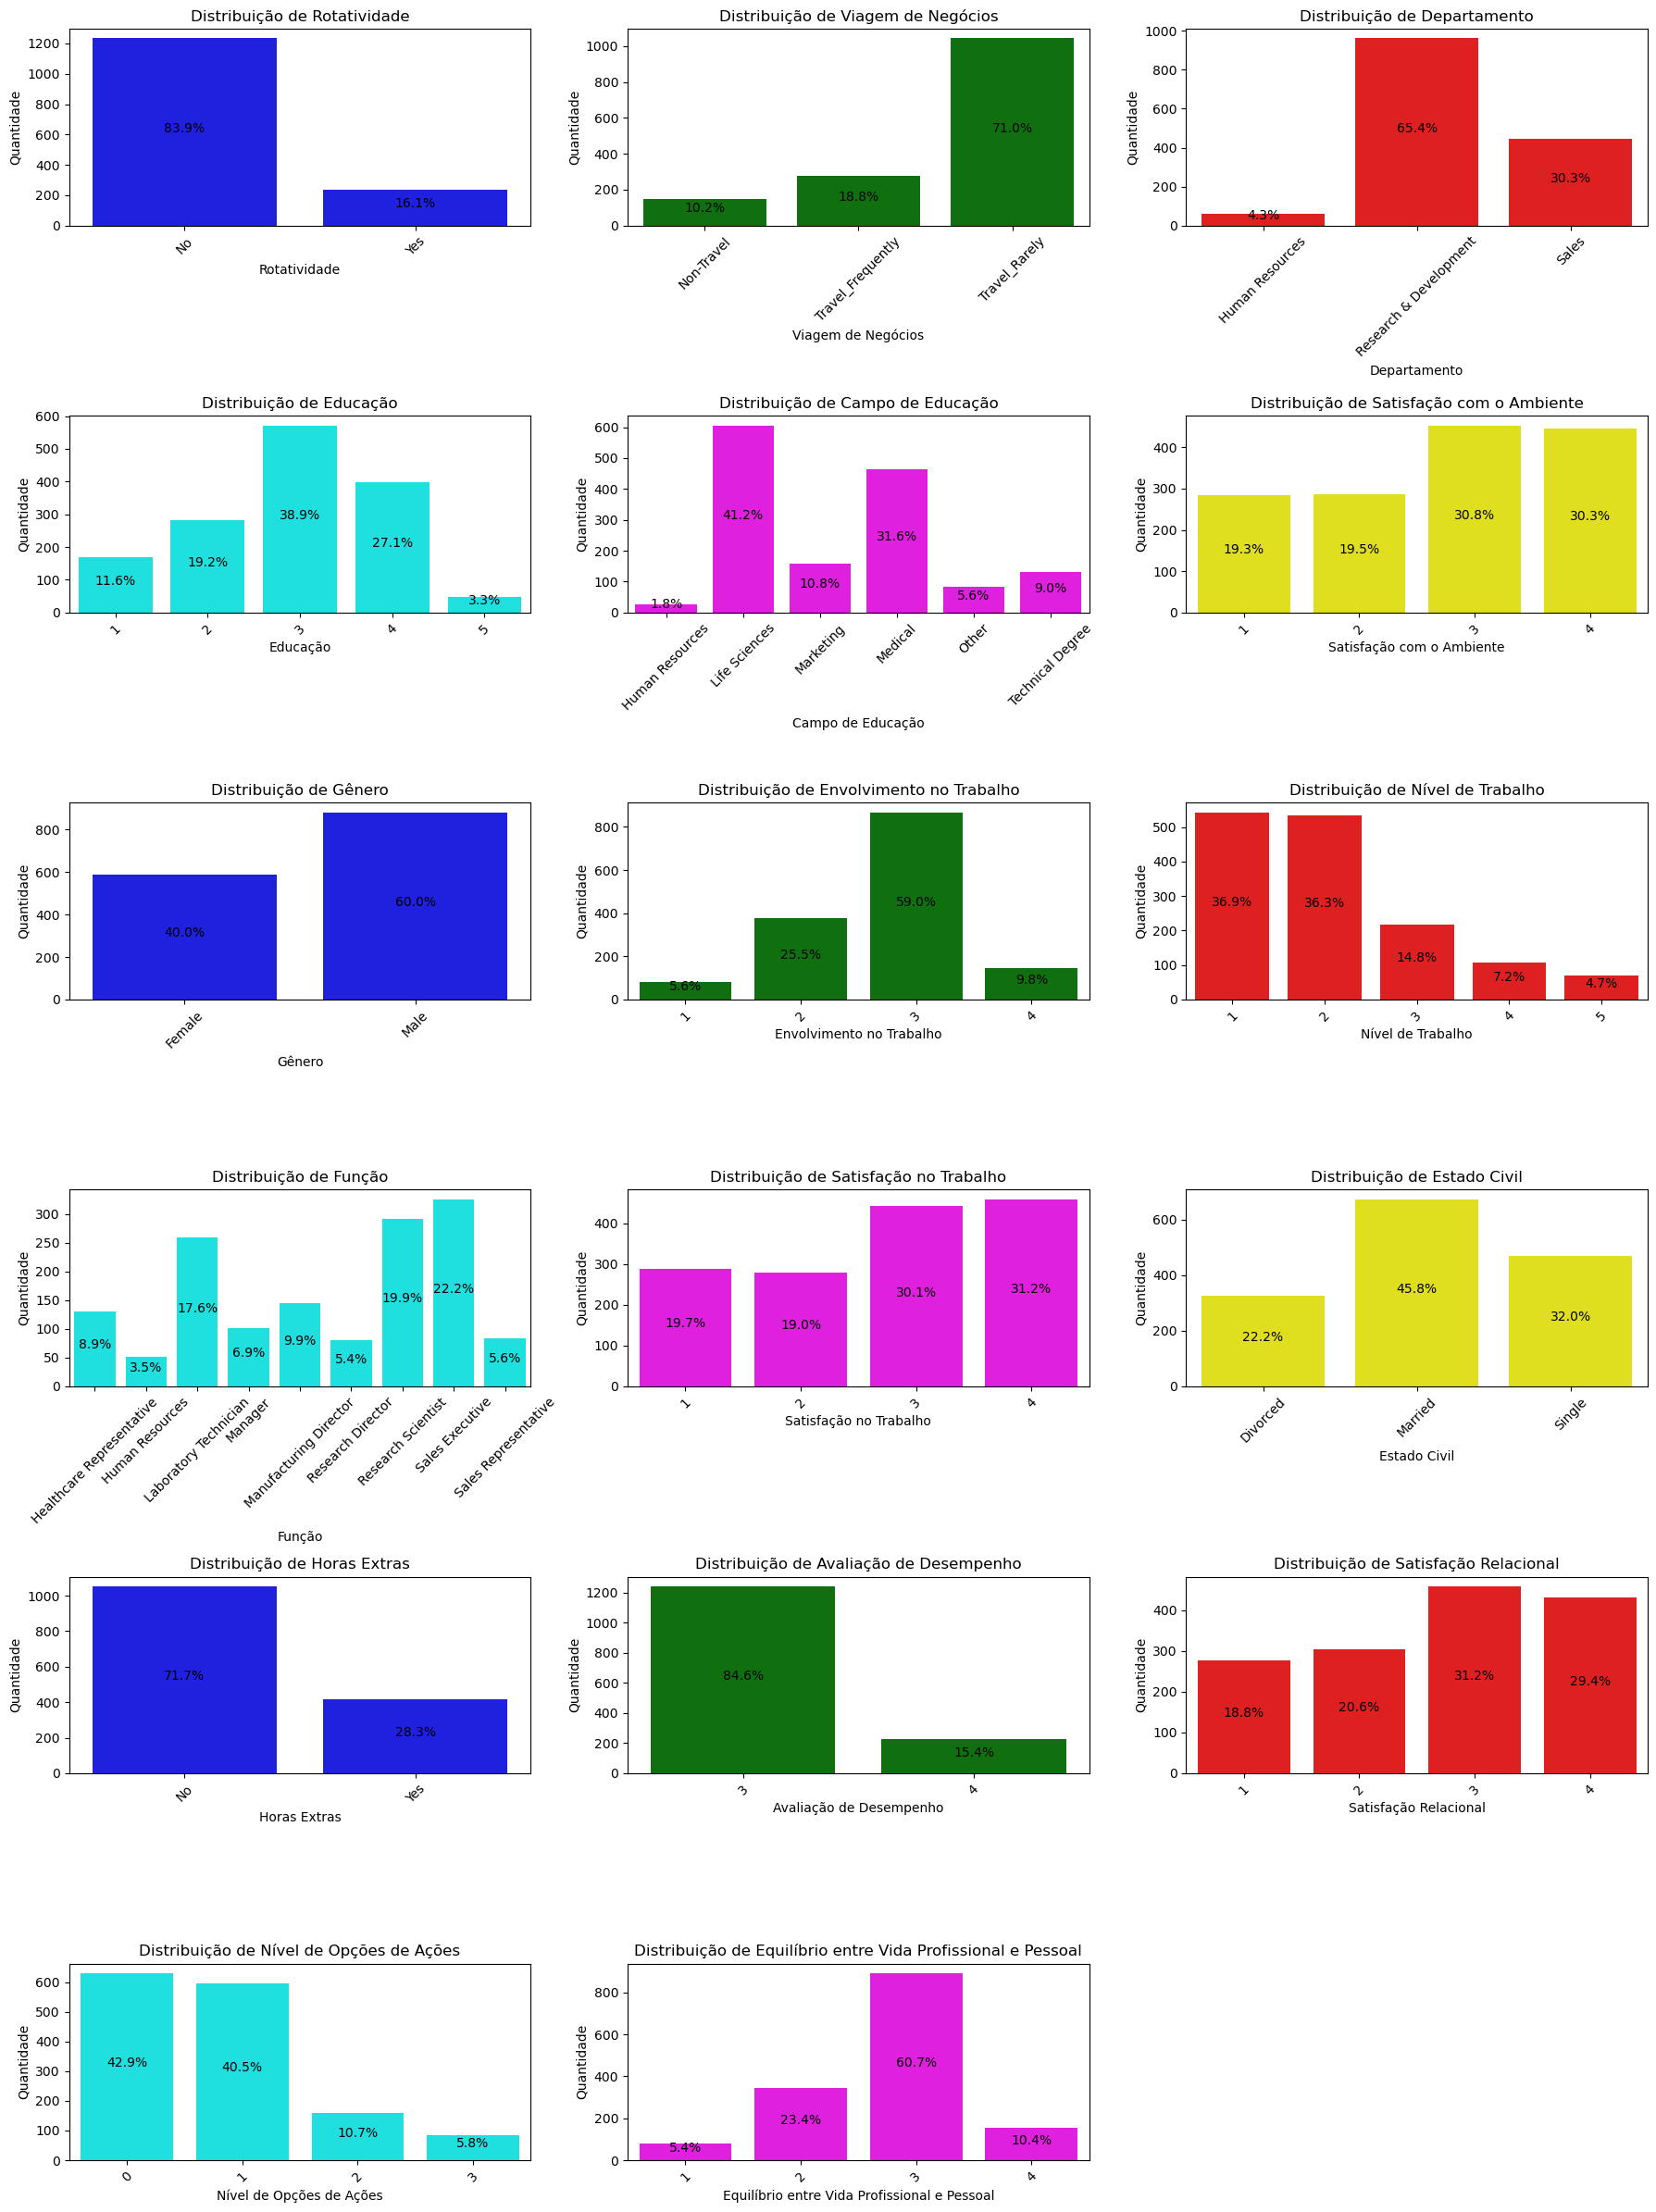

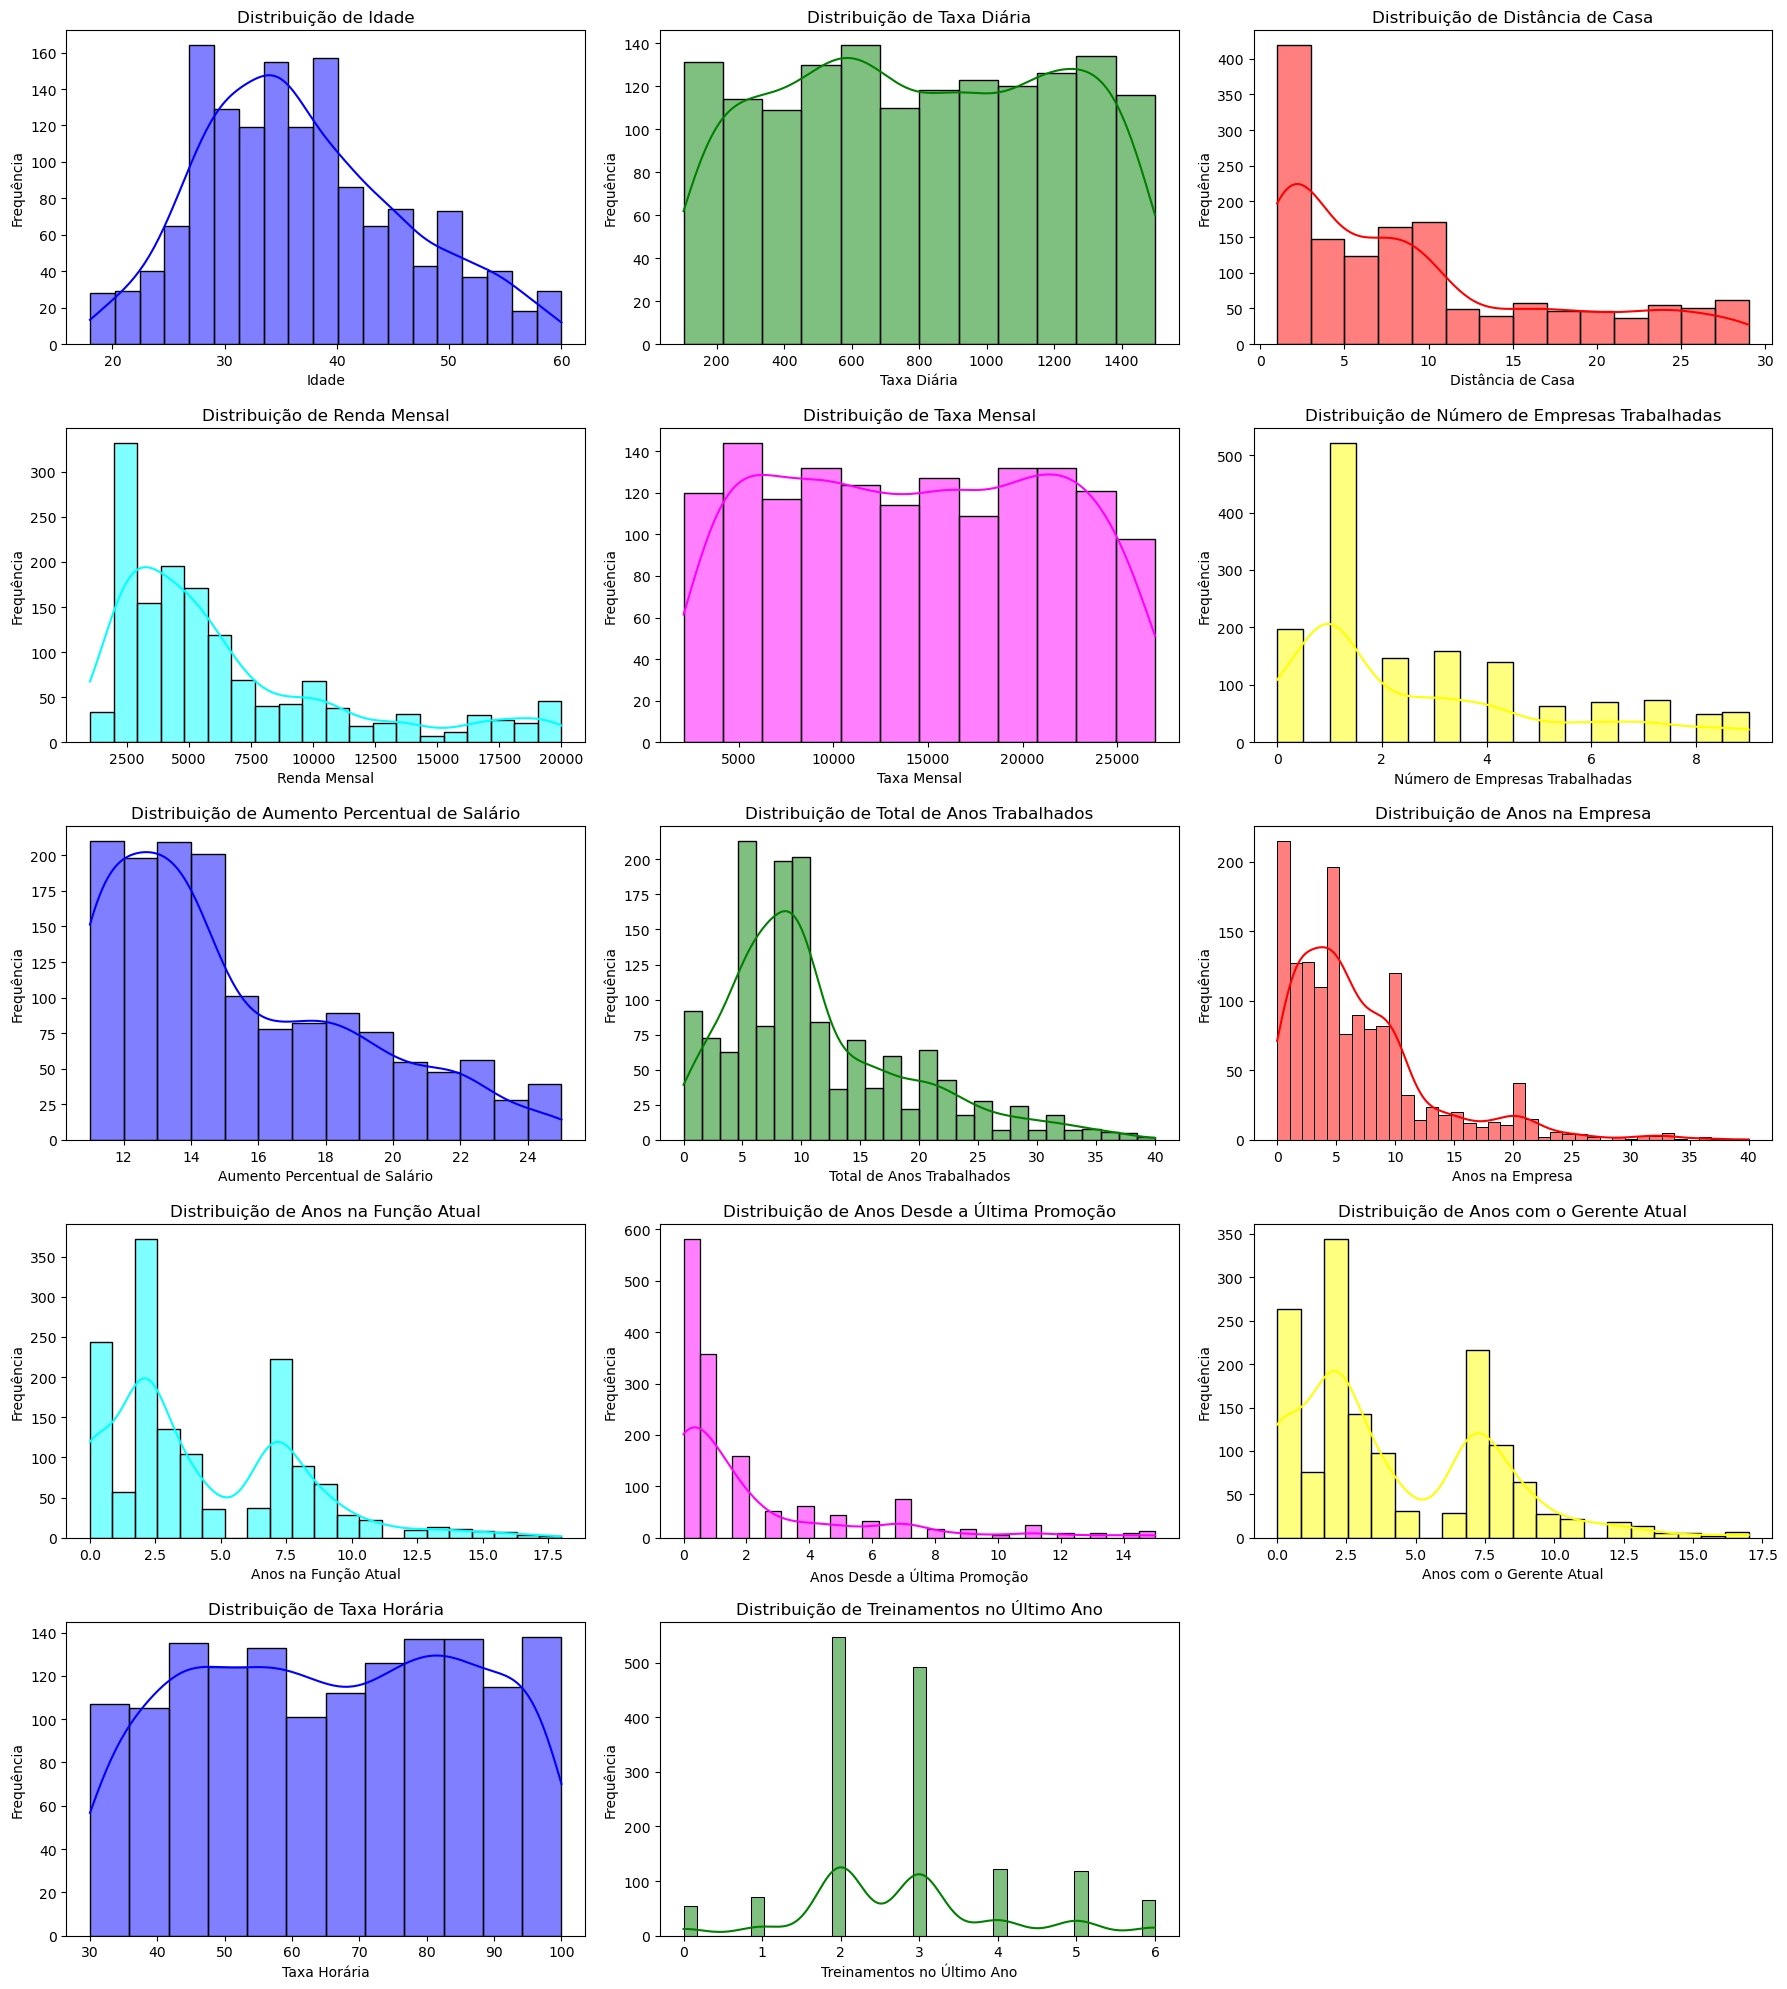

In [14]:
univariate_analysis(df,lista_booleana,lista_categoricas,lista_discretas,lista_continuas)

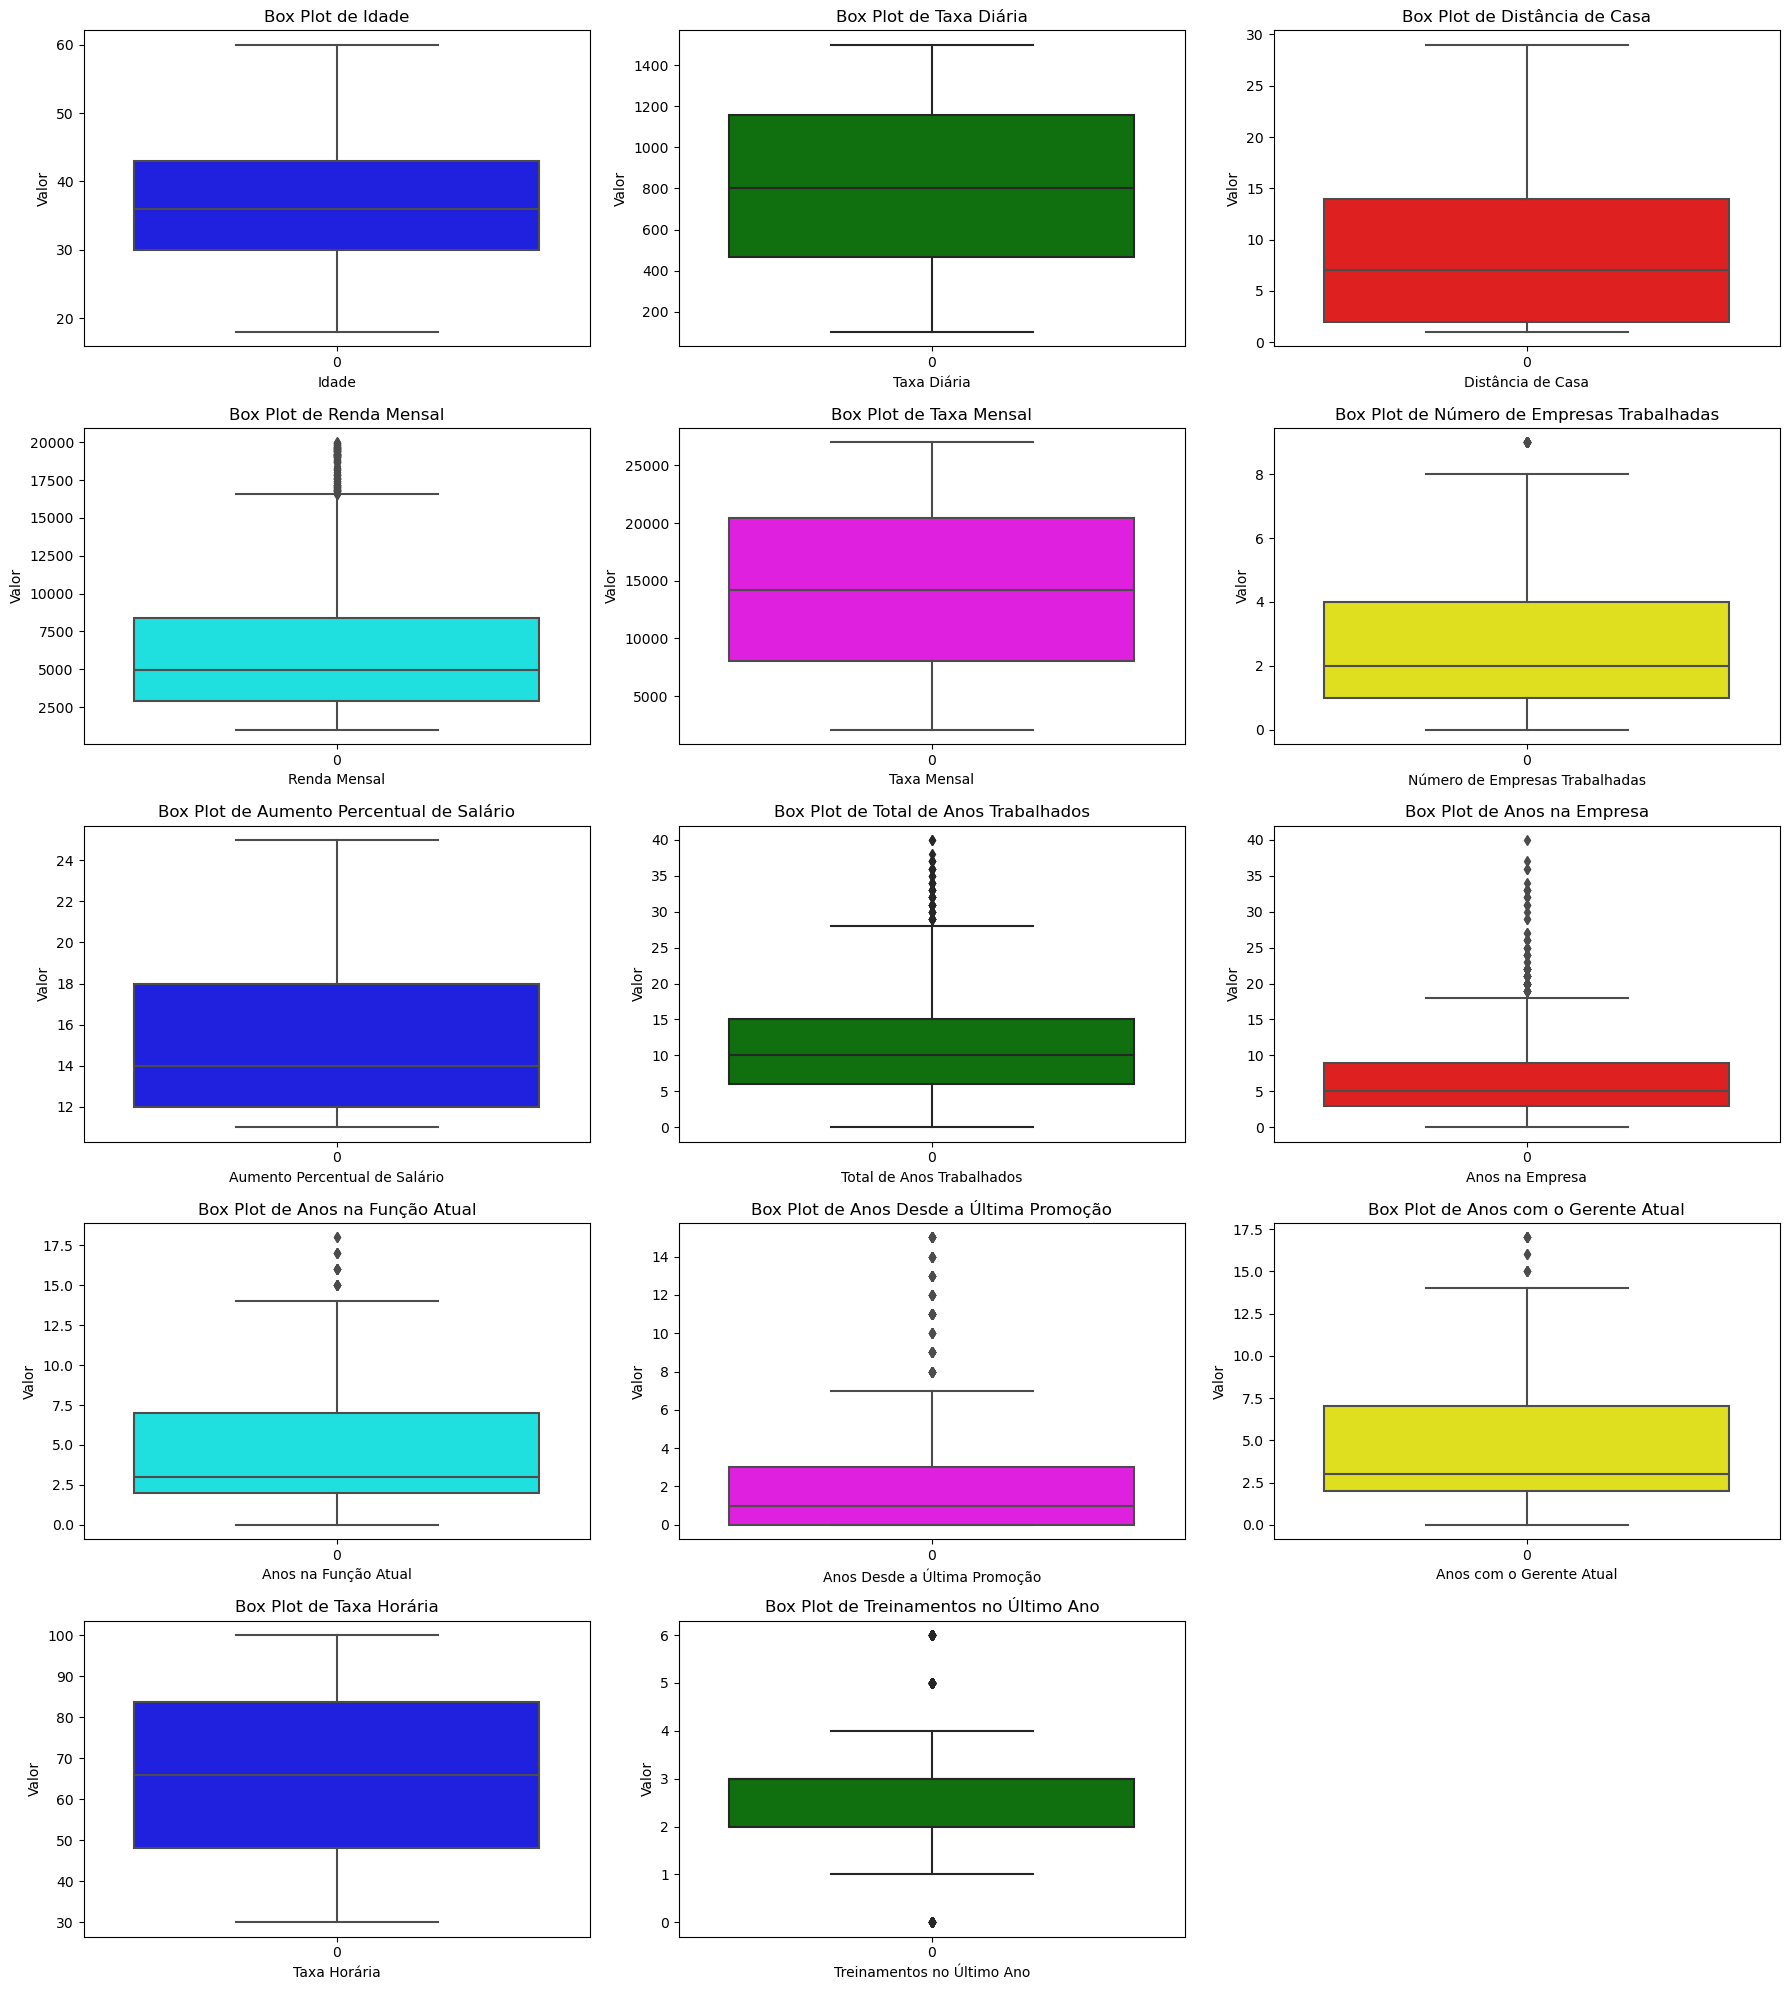

In [15]:
plot_boxplots(df, lista_continuas, colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])

In [16]:
df,linhas_removidas, percentual_reducao, colunas=remover_outliers(df, lista_continuas)

In [17]:
colunas

['Idade',
 'Taxa Diária',
 'Renda Mensal',
 'Taxa Mensal',
 'Total de Anos Trabalhados',
 'Anos na Empresa',
 'Anos na Função Atual',
 'Anos Desde a Última Promoção',
 'Anos com o Gerente Atual']

In [18]:
percentual_reducao

10.136054421768707

In [19]:
df.shape

(1321, 31)

In [20]:
df.columns

Index(['Idade', 'Rotatividade', 'Viagem de Negócios', 'Taxa Diária',
       'Departamento', 'Distância de Casa', 'Educação', 'Campo de Educação',
       'Satisfação com o Ambiente', 'Gênero', 'Taxa Horária',
       'Envolvimento no Trabalho', 'Nível de Trabalho', 'Função',
       'Satisfação no Trabalho', 'Estado Civil', 'Renda Mensal', 'Taxa Mensal',
       'Número de Empresas Trabalhadas', 'Horas Extras',
       'Aumento Percentual de Salário', 'Avaliação de Desempenho',
       'Satisfação Relacional', 'Nível de Opções de Ações',
       'Total de Anos Trabalhados', 'Treinamentos no Último Ano',
       'Equilíbrio entre Vida Profissional e Pessoal', 'Anos na Empresa',
       'Anos na Função Atual', 'Anos Desde a Última Promoção',
       'Anos com o Gerente Atual'],
      dtype='object')

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,1321.0,36.353520,8.502135,19.0,30.0,35.0,42.0,58.0
Taxa Diária,1321.0,806.951552,395.473396,117.0,472.0,809.0,1157.0,1485.0
Distância de Casa,1321.0,9.189251,8.098105,1.0,2.0,7.0,14.0,29.0
Taxa Horária,1321.0,65.924300,20.390402,30.0,48.0,66.0,84.0,100.0
Renda Mensal,1321.0,6162.629826,4249.257708,1393.0,2933.0,4810.0,7632.0,19626.0
Taxa Mensal,1321.0,14215.733535,6929.082086,2326.0,8213.0,14075.0,20308.0,26589.0
Número de Empresas Trabalhadas,1321.0,2.668433,2.504961,0.0,1.0,2.0,4.0,9.0
Aumento Percentual de Salário,1321.0,15.196064,3.637579,11.0,12.0,14.0,18.0,25.0
Total de Anos Trabalhados,1321.0,10.585163,6.755955,1.0,6.0,9.0,14.0,35.0
Treinamentos no Último Ano,1321.0,2.803936,1.273928,0.0,2.0,3.0,3.0,6.0


## Encoder

In [22]:
mapping_dict = {'Yes': 1, 'No': 0}
df['Rotatividade'] = df['Rotatividade'].map(mapping_dict)


df['Gênero'] = df['Gênero'].replace({"Female":0 ,"Male":1})



df = pd.get_dummies(df, columns=['Viagem de Negócios', 'Departamento', 'Campo de Educação', 'Função', 'Estado Civil', 'Horas Extras'], drop_first=True)




In [23]:
df.shape

(1321, 45)

In [24]:
df.columns

Index(['Idade', 'Rotatividade', 'Taxa Diária', 'Distância de Casa', 'Educação',
       'Satisfação com o Ambiente', 'Gênero', 'Taxa Horária',
       'Envolvimento no Trabalho', 'Nível de Trabalho',
       'Satisfação no Trabalho', 'Renda Mensal', 'Taxa Mensal',
       'Número de Empresas Trabalhadas', 'Aumento Percentual de Salário',
       'Avaliação de Desempenho', 'Satisfação Relacional',
       'Nível de Opções de Ações', 'Total de Anos Trabalhados',
       'Treinamentos no Último Ano',
       'Equilíbrio entre Vida Profissional e Pessoal', 'Anos na Empresa',
       'Anos na Função Atual', 'Anos Desde a Última Promoção',
       'Anos com o Gerente Atual', 'Viagem de Negócios_Travel_Frequently',
       'Viagem de Negócios_Travel_Rarely',
       'Departamento_Research & Development', 'Departamento_Sales',
       'Campo de Educação_Life Sciences', 'Campo de Educação_Marketing',
       'Campo de Educação_Medical', 'Campo de Educação_Other',
       'Campo de Educação_Technical Degree', 

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,1321.0,36.353520,8.502135,19.0,30.0,35.0,42.0,58.0
Taxa Diária,1321.0,806.951552,395.473396,117.0,472.0,809.0,1157.0,1485.0
Distância de Casa,1321.0,9.189251,8.098105,1.0,2.0,7.0,14.0,29.0
Taxa Horária,1321.0,65.924300,20.390402,30.0,48.0,66.0,84.0,100.0
Renda Mensal,1321.0,6162.629826,4249.257708,1393.0,2933.0,4810.0,7632.0,19626.0
Taxa Mensal,1321.0,14215.733535,6929.082086,2326.0,8213.0,14075.0,20308.0,26589.0
Número de Empresas Trabalhadas,1321.0,2.668433,2.504961,0.0,1.0,2.0,4.0,9.0
Aumento Percentual de Salário,1321.0,15.196064,3.637579,11.0,12.0,14.0,18.0,25.0
Total de Anos Trabalhados,1321.0,10.585163,6.755955,1.0,6.0,9.0,14.0,35.0
Treinamentos no Último Ano,1321.0,2.803936,1.273928,0.0,2.0,3.0,3.0,6.0


# Hiperparâmetros

In [26]:
#mapeamento
kmeans_clusters_range = range(2, 21)
dbscan_eps_range = np.arange(0.1,5,0.1)
dbscan_min_samples_range = range(3, 11)
agglomerative_clusters_range = range(2, 21)


In [27]:
def find_best_silhouette(X_scaled, kmeans_clusters_range, dbscan_eps_range, dbscan_min_samples_range, agglomerative_clusters_range):
    kmeans_scores = []
    dbscan_scores = []
    agglomerative_scores = []
    kmeans_coesao_list = []  # For KMeans cohesion (WCSS)
    kmeans_separacao_list = []  # For KMeans separation
    dbscan_coesao_list = []
    dbscan_separacao_list = []
    agglomerative_coesao_list = []
    agglomerative_separacao_list = []
    
    # Calculate global centroid for separation
    global_centroid = np.mean(X_scaled, axis=0)

    # Grid search for KMeans
    for n_clusters in kmeans_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        kmeans_scores.append((n_clusters, score))
        
        # Cohesion (WCSS) for KMeans
        kmeans_coesao_list.append(kmeans.inertia_)
        
        # Separation for KMeans
        kmeans_separation = np.sum([np.linalg.norm(centroid - global_centroid) ** 2 for centroid in kmeans.cluster_centers_])
        kmeans_separacao_list.append(kmeans_separation)

    # Grid search for DBSCAN
    for eps in dbscan_eps_range:
        for min_samples in dbscan_min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_scaled)
            if len(set(labels)) > 1:  # Check if there are at least two clusters
                score = silhouette_score(X_scaled, labels)
            else:
                score = -1
            dbscan_scores.append((eps, min_samples, score))
            
            # Cohesion for DBSCAN (variance within clusters)
            dbscan_cohesion = np.sum([np.var(X_scaled[labels == i], axis=0).sum() for i in set(labels) if i != -1])
            dbscan_coesao_list.append(dbscan_cohesion)
            
            # Separation for DBSCAN
            dbscan_centroids = [X_scaled[labels == i].mean(axis=0) for i in set(labels) if i != -1]
            dbscan_separation = np.sum([np.linalg.norm(centroid - global_centroid) ** 2 for centroid in dbscan_centroids])
            dbscan_separacao_list.append(dbscan_separation)

    # Grid search for AgglomerativeClustering with different linkages
    linkages = ['ward', 'complete', 'average', 'single']
    for linkage in linkages:
        for n_clusters in agglomerative_clusters_range:
            agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            labels = agglomerative.fit_predict(X_scaled)
            score = silhouette_score(X_scaled, labels)
            agglomerative_scores.append((n_clusters, linkage, score))
            
            # Cohesion for AgglomerativeClustering
            agglomerative_cohesion = np.sum([np.var(X_scaled[labels == i], axis=0).sum() for i in set(labels)])
            agglomerative_coesao_list.append(agglomerative_cohesion)
            
            # Separation for AgglomerativeClustering
            agglomerative_centroids = [X_scaled[labels == i].mean(axis=0) for i in set(labels)]
            agglomerative_separation = np.sum([np.linalg.norm(centroid - global_centroid) ** 2 for centroid in agglomerative_centroids])
            agglomerative_separacao_list.append(agglomerative_separation)

    # Convert results to DataFrames
    kmeans_df = pd.DataFrame(kmeans_scores, columns=['n_clusters', 'silhouette_score'])
    dbscan_df = pd.DataFrame(dbscan_scores, columns=['eps', 'min_samples', 'silhouette_score'])
    agglomerative_df = pd.DataFrame(agglomerative_scores, columns=['n_clusters', 'linkage', 'silhouette_score'])

    # Find the best result for each algorithm
    best_kmeans = kmeans_df.loc[kmeans_df['silhouette_score'].idxmax()]
    best_dbscan = dbscan_df.loc[dbscan_df['silhouette_score'].idxmax()]
    best_agglomerative = agglomerative_df.loc[agglomerative_df['silhouette_score'].idxmax()]
    
    # Get cohesion and separation for best configurations
    best_kmeans_idx = kmeans_clusters_range.index(best_kmeans['n_clusters'])
    best_kmeans_coesao = kmeans_coesao_list[best_kmeans_idx]
    best_kmeans_separacao = kmeans_separacao_list[best_kmeans_idx]

    best_dbscan_idx = dbscan_scores.index((best_dbscan['eps'], best_dbscan['min_samples'], best_dbscan['silhouette_score']))
    best_dbscan_coesao = dbscan_coesao_list[best_dbscan_idx]
    best_dbscan_separacao = dbscan_separacao_list[best_dbscan_idx]

    best_agglomerative_idx = agglomerative_scores.index((best_agglomerative['n_clusters'], best_agglomerative['linkage'], best_agglomerative['silhouette_score']))
    best_agglomerative_coesao = agglomerative_coesao_list[best_agglomerative_idx]
    best_agglomerative_separacao = agglomerative_separacao_list[best_agglomerative_idx]


     # Create summary DataFrame
    summary_df = pd.DataFrame({
        'Algorithm': ['KMeans', 'DBSCAN', 'AgglomerativeClustering'],
        'Best Configurations': [
            f'n_clusters: {best_kmeans["n_clusters"]}',
            f'eps: {best_dbscan["eps"]}, min_samples: {best_dbscan["min_samples"]}',
            f'n_clusters: {best_agglomerative["n_clusters"]}, linkage: {best_agglomerative["linkage"]}'
        ],
        'Silhouette Score': [
            best_kmeans['silhouette_score'],
            best_dbscan['silhouette_score'],
            best_agglomerative['silhouette_score']
        ],
        'Cohesion': [
            best_kmeans_coesao,
            best_dbscan_coesao,
            best_agglomerative_coesao
        ],
        'Separation': [
            best_kmeans_separacao,
            best_dbscan_separacao,
            best_agglomerative_separacao
        ]
    })


    # Print the best results
    print(f'Best KMeans: {best_kmeans}')
    print(f'   Cohesion (WCSS) for Best KMeans: {best_kmeans_coesao}')
    print(f'   Separation for Best KMeans: {best_kmeans_separacao}')
    
    print(f'Best DBSCAN: {best_dbscan}')
    print(f'   Cohesion for Best DBSCAN: {best_dbscan_coesao}')
    print(f'   Separation for Best DBSCAN: {best_dbscan_separacao}')
    
    print(f'Best AgglomerativeClustering: {best_agglomerative}')
    print(f'   Cohesion for Best AgglomerativeClustering: {best_agglomerative_coesao}')
    print(f'   Separation for Best AgglomerativeClustering: {best_agglomerative_separacao}')

    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
    # Plot silhouette scores for different algorithms
    plt.figure(figsize=(18, 6))

    # Criar uma figura com três subgráficos (um abaixo do outro)
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))  # 3 linhas, 1 coluna
    
    # Plot KMeans Silhouette Scores
    axs[0].plot(kmeans_df['n_clusters'], kmeans_df['silhouette_score'], marker='o', linestyle='--', color=colors[0])
    axs[0].set_xlabel('Número de Clusters')
    axs[0].set_ylabel('Silhouette Score')
    axs[0].set_title('KMeans Silhouette Scores')
    
    # Plot DBSCAN Silhouette Scores
    scatter = axs[1].scatter(dbscan_df['eps'], dbscan_df['min_samples'], c=dbscan_df['silhouette_score'], cmap='viridis', s=50)
    axs[1].set_xlabel('Epsilon (eps)')
    axs[1].set_ylabel('Min Samples')
    axs[1].set_title('DBSCAN Silhouette Scores')
    fig.colorbar(scatter, ax=axs[1], label='Silhouette Score')
    
    # Plot AgglomerativeClustering Silhouette Scores
    for i, linkage in enumerate(linkages):
        subset = agglomerative_df[agglomerative_df['linkage'] == linkage]
        axs[2].plot(subset['n_clusters'], subset['silhouette_score'], marker='o', linestyle='--', label=linkage, color=colors[i % len(colors)])
    axs[2].set_xlabel('Número de Clusters')
    axs[2].set_ylabel('Silhouette Score')
    axs[2].set_title('AgglomerativeClustering Silhouette Scores')
    axs[2].legend(title='Linkage')
    
    # Ajustar o layout para não sobrepor os gráficos
    plt.tight_layout()
    
    # Exibir o gráfico
    plt.show()
    return summary_df

# Normalização

## StandardScaler

Best KMeans: n_clusters          4.00000
silhouette_score    0.09864
Name: 2, dtype: float64
   Cohesion (WCSS) for Best KMeans: 49491.342288637345
   Separation for Best KMeans: 41.70096207086485
Best DBSCAN: eps                 3.600000
min_samples         3.000000
silhouette_score   -0.065634
Name: 280, dtype: float64
   Cohesion for Best DBSCAN: 5.103715799362611
   Separation for Best DBSCAN: 28.21965691644344
Best AgglomerativeClustering: n_clusters                 2
linkage               single
silhouette_score    0.165727
Name: 57, dtype: object
   Cohesion for Best AgglomerativeClustering: 44.969203397227815
   Separation for Best AgglomerativeClustering: 85.58672638749182


<Figure size 1800x600 with 0 Axes>

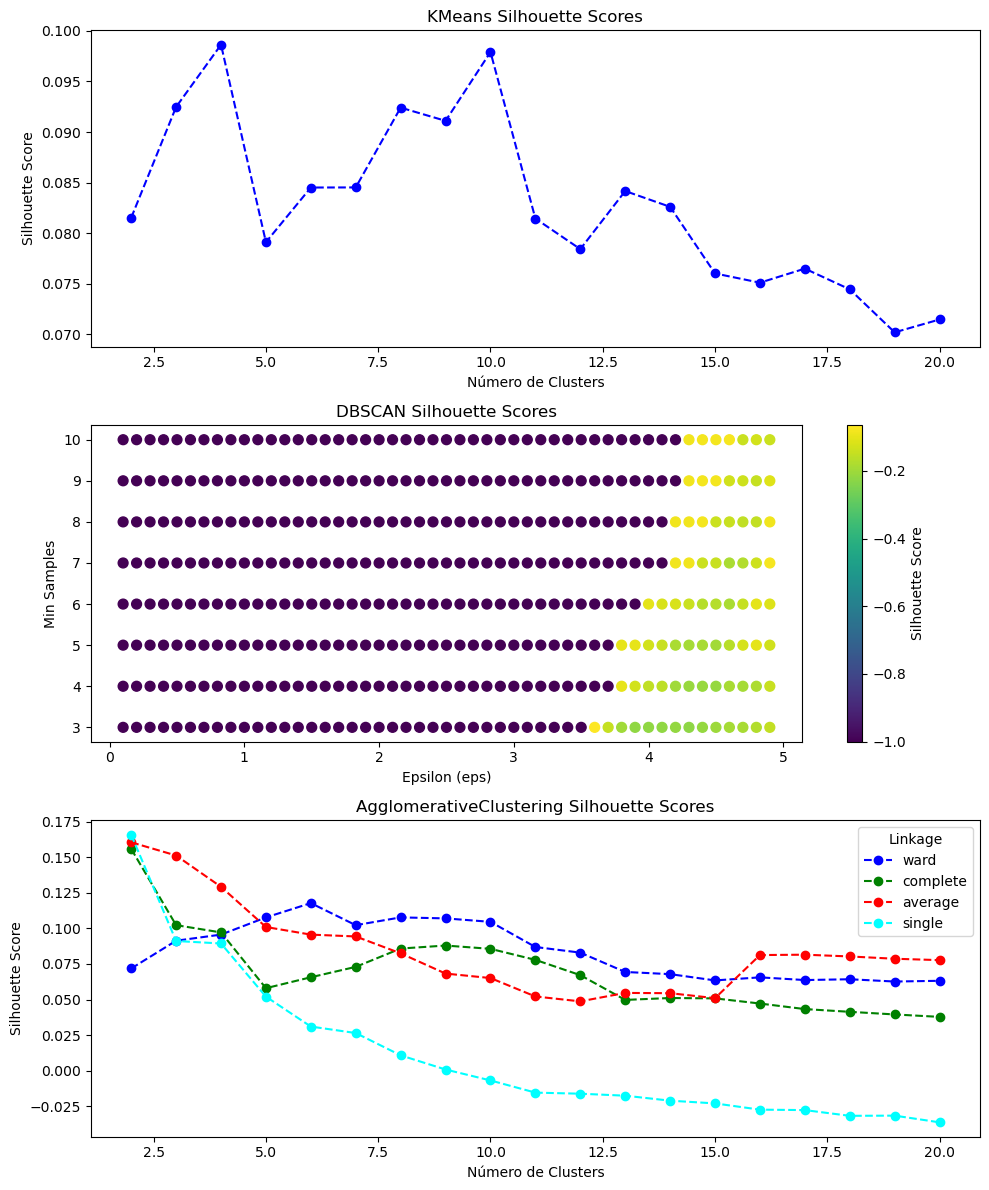

,Algorithm,Best Configurations,Silhouette Score,Cohesion,Separation
0,KMeans,n_clusters: 4.0,0.098640,49491.342289,41.700962
1,DBSCAN,"eps: 3.6, min_samples: 3.0",-0.065634,5.103716,28.219657
2,AgglomerativeClustering,"n_clusters: 2, linkage: single",0.165727,44.969203,85.586726


In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
summary_df = find_best_silhouette(df_scaled,kmeans_clusters_range,dbscan_eps_range,dbscan_min_samples_range,agglomerative_clusters_range)


summary_df


## RobustScaler 

Best KMeans: n_clusters          2.000000
silhouette_score    0.180688
Name: 0, dtype: float64
   Cohesion (WCSS) for Best KMeans: 19317.979460941555
   Separation for Best KMeans: 7.327566434333769
Best DBSCAN: eps                 4.400000
min_samples         3.000000
silhouette_score    0.284804
Name: 344, dtype: float64
   Cohesion for Best DBSCAN: 17.116624922865654
   Separation for Best DBSCAN: 9.977902409056898e-05
Best AgglomerativeClustering: n_clusters                 2
linkage              average
silhouette_score    0.312324
Name: 38, dtype: object
   Cohesion for Best AgglomerativeClustering: 29.987108973838634
   Separation for Best AgglomerativeClustering: 38.065339062779174


<Figure size 1800x600 with 0 Axes>

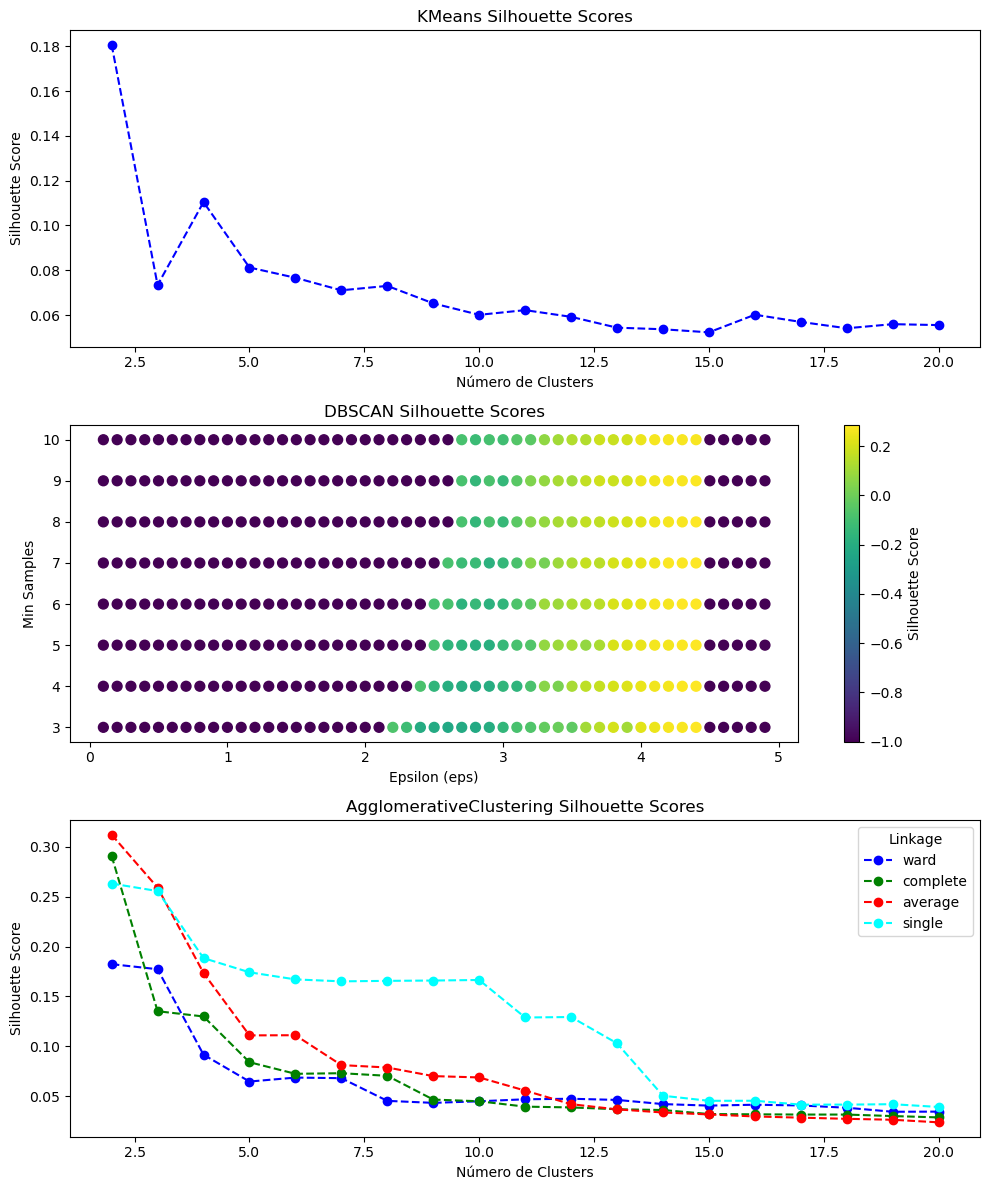

,Algorithm,Best Configurations,Silhouette Score,Cohesion,Separation
0,KMeans,n_clusters: 2.0,0.180688,19317.979461,7.327566
1,DBSCAN,"eps: 4.3999999999999995, min_samples: 3.0",0.284804,17.116625,0.000100
2,AgglomerativeClustering,"n_clusters: 2, linkage: average",0.312324,29.987109,38.065339


In [29]:
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)
summary_df = find_best_silhouette(df_scaled , kmeans_clusters_range, dbscan_eps_range, dbscan_min_samples_range, agglomerative_clusters_range)


summary_df

## MinMaxScaler

Best KMeans: n_clusters          2.000000
silhouette_score    0.132164
Name: 0, dtype: float64
   Cohesion (WCSS) for Best KMeans: 5773.4049241687635
   Separation for Best KMeans: 1.6586671967984017
Best DBSCAN: eps                 2.400000
min_samples         7.000000
silhouette_score    0.170696
Name: 188, dtype: float64
   Cohesion for Best DBSCAN: 4.969675673873785
   Separation for Best DBSCAN: 1.3329316469007916e-05
Best AgglomerativeClustering: n_clusters                 2
linkage               single
silhouette_score    0.162771
Name: 57, dtype: object
   Cohesion for Best AgglomerativeClustering: 4.973245730156241
   Separation for Best AgglomerativeClustering: 9.316743102953824


<Figure size 1800x600 with 0 Axes>

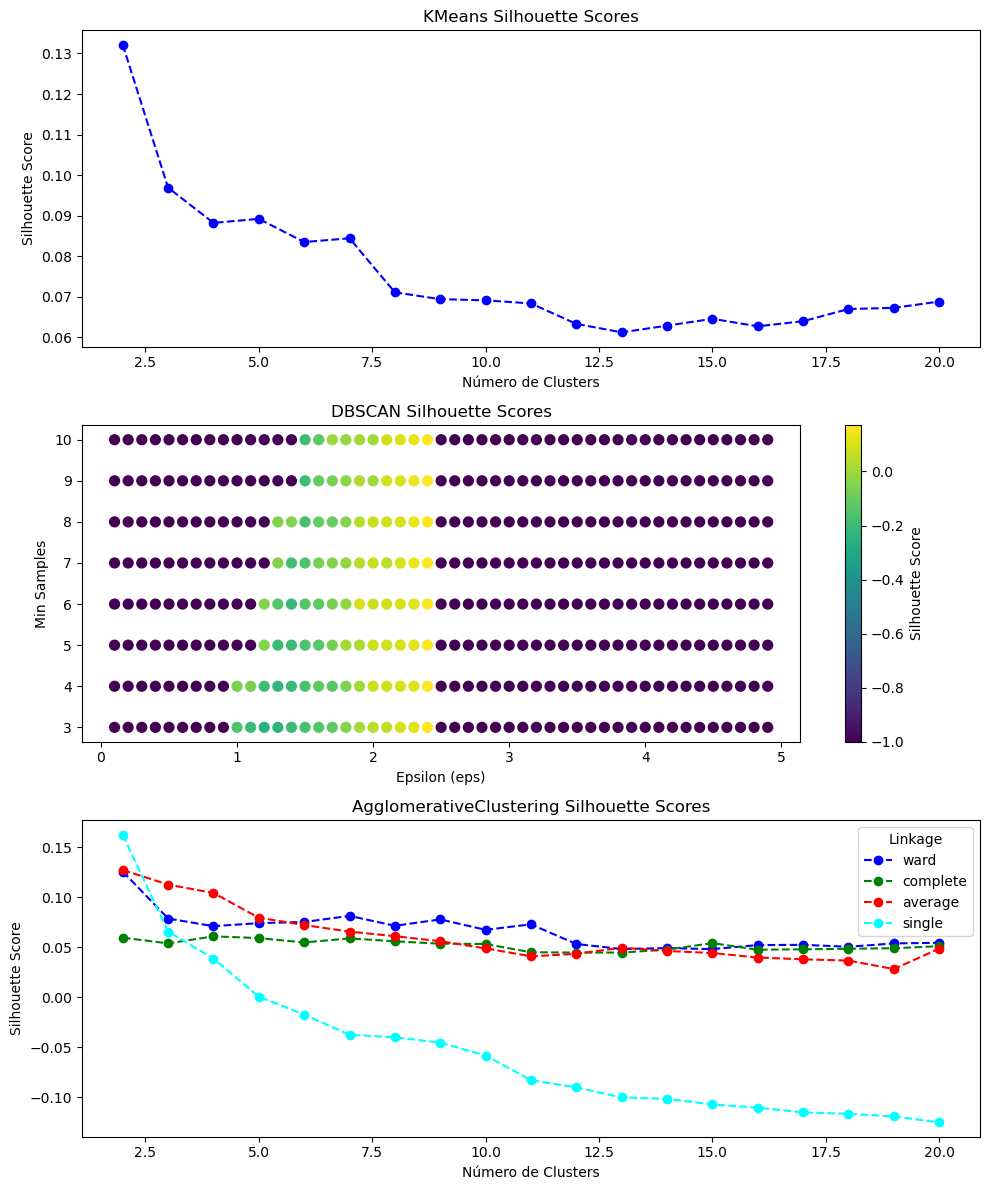

,Algorithm,Best Configurations,Silhouette Score,Cohesion,Separation
0,KMeans,n_clusters: 2.0,0.132164,5773.404924,1.658667
1,DBSCAN,"eps: 2.4000000000000004, min_samples: 7.0",0.170696,4.969676,0.000013
2,AgglomerativeClustering,"n_clusters: 2, linkage: single",0.162771,4.973246,9.316743


In [30]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
summary_df = find_best_silhouette(df_scaled,kmeans_clusters_range,dbscan_eps_range,dbscan_min_samples_range,agglomerative_clusters_range)

summary_df

# Critérios para Avaliação de Modelos de Clustering

## 1. Silhouette Score: Avalia a Qualidade dos Clusters
- **Intervalo:** -1 a 1. 
- **Interpretação:** Quanto maior o silhouette score, mais bem definidos estão os clusters. Scores altos indicam que os pontos estão próximos ao seu próprio cluster e distantes de outros clusters.
- **Aplicação:** Selecione o modelo com o maior silhouette score, desde que coesão e separação sejam aceitáveis. Scores altos indicam clusters bem definidos.

## 2. Coesão (WCSS): Avalia a Compacidade Intra-Cluster
- **Valores Ideais:** Baixos. Coesão baixa significa que os pontos dentro de cada cluster estão próximos entre si, indicando clusters compactos.
- **Interpretação:** Modelos com baixa coesão tendem a ter clusters compactos e significativos. Porém, uma coesão muito baixa pode indicar clusters excessivamente pequenos e específicos, sugerindo um possível superajuste.

## 3. Separação: Avalia a Distinção Entre os Clusters
- **Valores Ideais:** Altos. Uma separação alta indica centróides de clusters distantes entre si, sugerindo clusters bem distintos.
- **Interpretação:** Prefira modelos com alta separação, pois clusters bem separados são indicativos de distinção. No entanto, uma alta separação acompanhada de um silhouette score baixo ou uma coesão alta pode significar clustering disperso ou impreciso.

## 4. Escolhendo o Melhor Modelo
- **KMeans:** É ideal para clusters esféricos e bem definidos. Escolha-o se o silhouette score for alto, a coesão for baixa e a separação for alta.
- **DBSCAN:** Robusto para dados com ruído e clusters de formas irregulares. Escolha o DBSCAN se ele apresentar um silhouette score alto, coesão razoável e alta separação, com poucos outliers.
- **AgglomerativeClustering:** Adequado para estruturas hierárquicas e critérios de ligação flexíveis. É preferível se for necessária uma hierarquia nos clusters e se ele alcançar um silhouette score alto com coesão e separação razoáveis.


# Resultados - Visualizar os clusters

Best KMeans: n_clusters          2.000000
silhouette_score    0.180688
Name: 0, dtype: float64
   Cohesion (WCSS) for Best KMeans: 19317.979460941555
   Separation for Best KMeans: 7.327566434333767
Best DBSCAN: eps                 4.400000
min_samples         3.000000
silhouette_score    0.284804
Name: 344, dtype: float64
   Cohesion for Best DBSCAN: 17.116624922865654
   Separation for Best DBSCAN: 9.977902409056898e-05
Best AgglomerativeClustering: n_clusters                 2
linkage              average
silhouette_score    0.312324
Name: 2, dtype: object
   Cohesion for Best AgglomerativeClustering: 29.987108973838634
   Separation for Best AgglomerativeClustering: 38.065339062779174


<Figure size 1800x600 with 0 Axes>

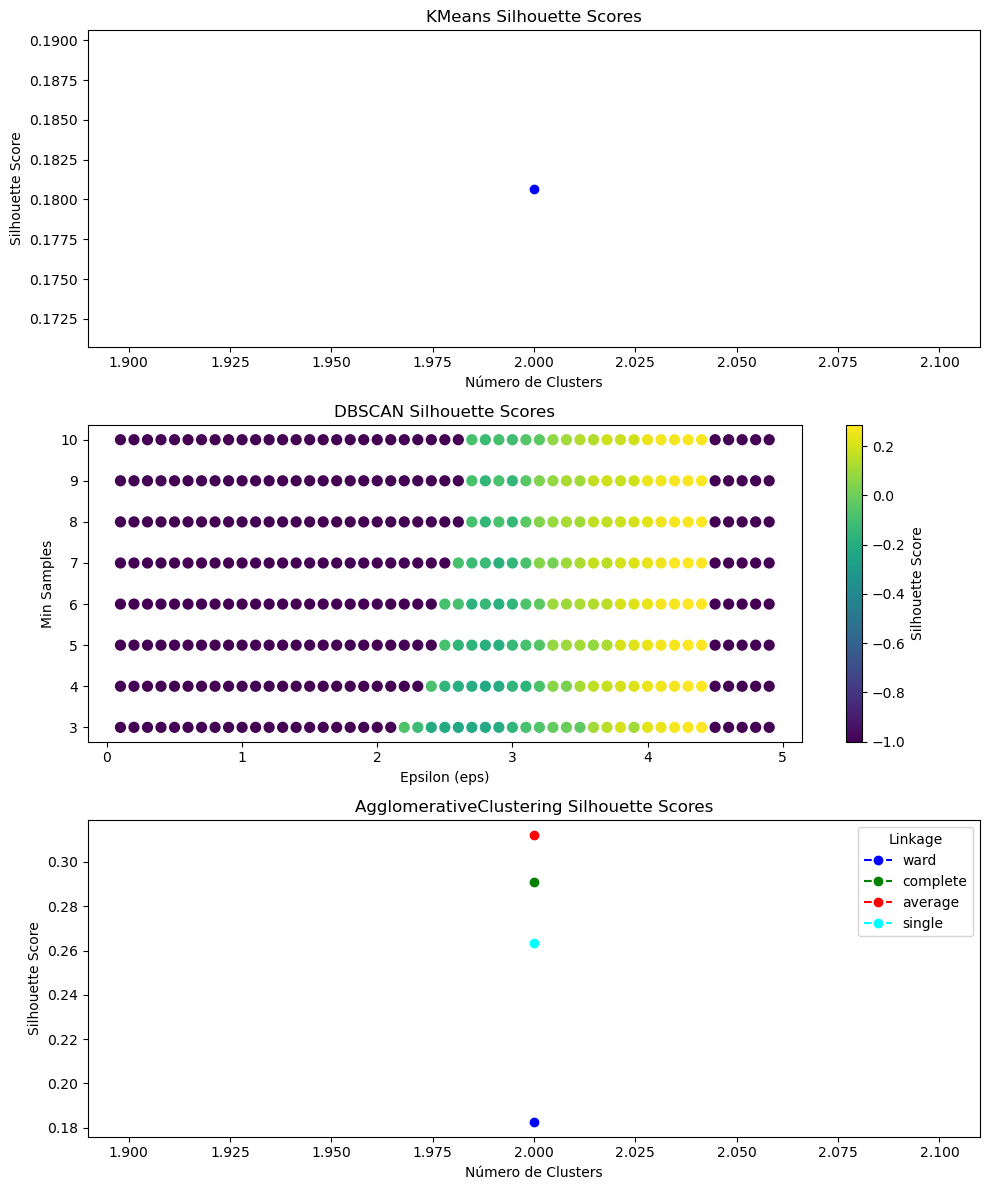

,Algorithm,Best Configurations,Silhouette Score,Cohesion,Separation
0,KMeans,n_clusters: 2.0,0.180688,19317.979461,7.327566
1,DBSCAN,"eps: 4.3999999999999995, min_samples: 3.0",0.284804,17.116625,0.000100
2,AgglomerativeClustering,"n_clusters: 2, linkage: average",0.312324,29.987109,38.065339


In [31]:
df_scaled = RobustScaler().fit_transform(df)

find_best_silhouette(df_scaled,[2],dbscan_eps_range,dbscan_min_samples_range,[2])

In [32]:
#kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
#labels = kmeans.fit_predict(df_scaled)

AgglomerativeClustering=AgglomerativeClustering(n_clusters=2, linkage='average')
labels = AgglomerativeClustering.fit_predict(df_scaled)


#dbscan = DBSCAN(eps=4.700000, min_samples=3)
#labels = dbscan.fit_predict(df_scaled)


# Calcular a pontuação da silhueta
silhouette_avg = silhouette_score(df_scaled, labels)
print(f'A pontuação média da silhueta é: {round (silhouette_avg,2)}')


A pontuação média da silhueta é: 0.31


In [33]:
df_clustering = df.copy()
df_clustering['cluster'] = labels
df_count = df_clustering.groupby(by=["cluster"]).size().reset_index(name="counts")
df_count

,cluster,counts
0,0,1283
1,1,38


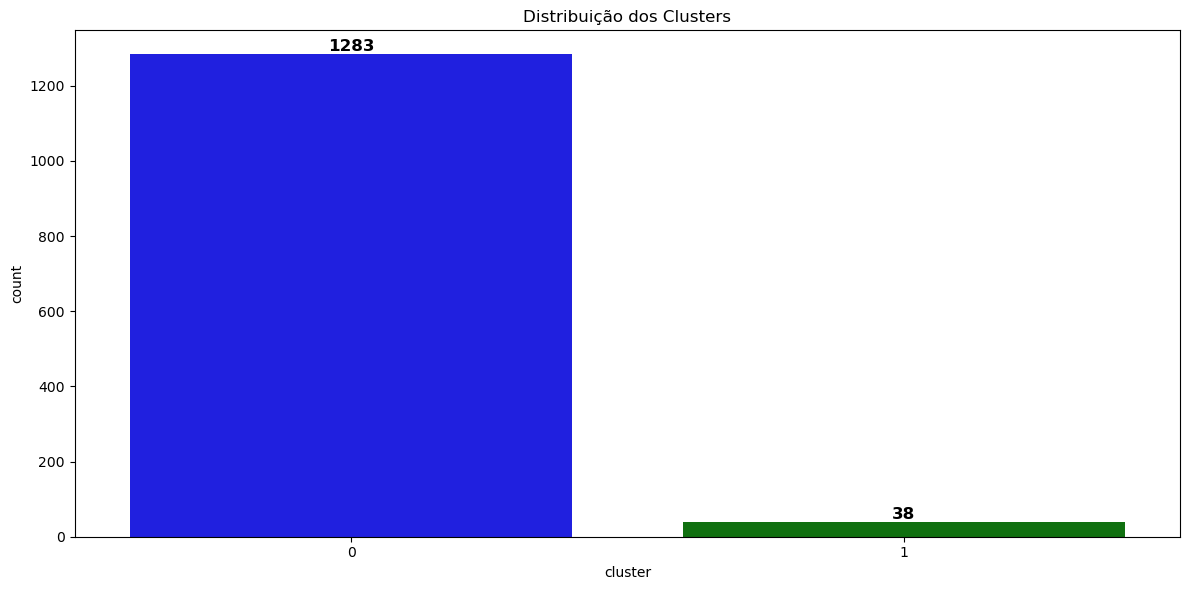

In [34]:
# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(12, 6))

# Definindo as cores
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

# Criando o gráfico de contagem
sns.countplot(data=df_clustering, x='cluster', ax=ax, palette=colors)

# Adicionando os valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Configurando título e layout
ax.set_title('Distribuição dos Clusters')
plt.tight_layout()
plt.show()

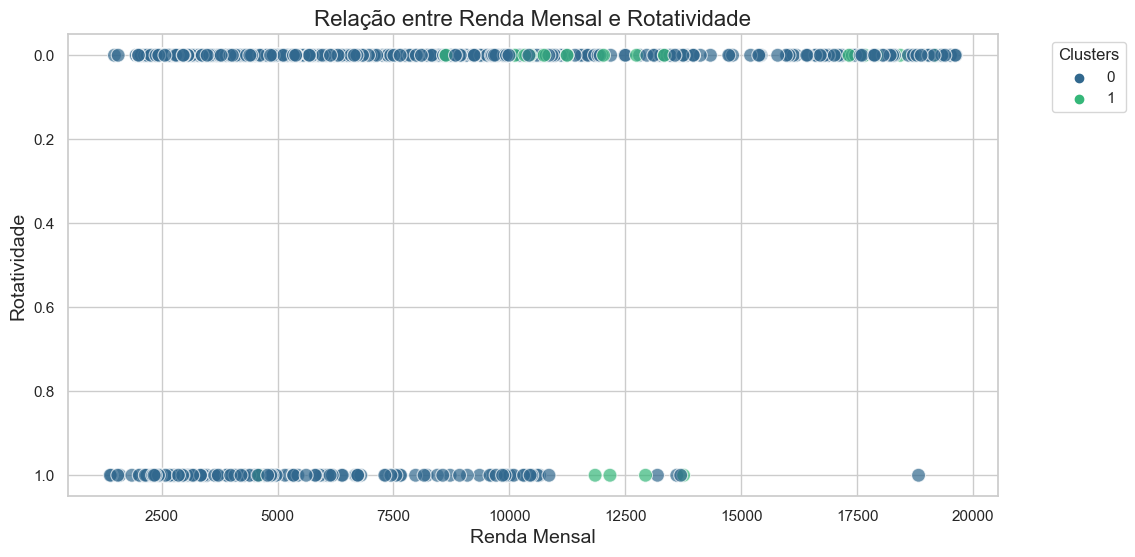

In [35]:
df["Clusters"]=labels
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de dispersão
plt.figure(figsize=(12, 6))
pl = sns.scatterplot(data=df, x='Renda Mensal', y='Rotatividade', hue='Clusters', 
                     palette='viridis', s=100, alpha=0.7, edgecolor='w')

# Adicionando título e rótulos
plt.title('Relação entre Renda Mensal e Rotatividade', fontsize=16)
plt.xlabel('Renda Mensal', fontsize=14)
plt.ylabel('Rotatividade', fontsize=14)

# Adicionando a legenda
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionando uma grade
plt.grid(True)

# Mostrando o gráfico
plt.show()

In [36]:
df.loc[df["Clusters"]==0].describe().T.to_excel("estatistica descritiva cluster 0.xlsx")

In [37]:
df.loc[df["Clusters"]==1].describe().T.to_excel("estatistica descritiva cluster 1.xlsx")

In [38]:
df.loc[(df["Clusters"]==0) & (df["Rotatividade"]==1)].shape[0]/(df.loc[(df["Clusters"]==0)].shape[0])

0.16056118472330475

In [39]:
df.loc[(df["Clusters"]==1) & (df["Rotatividade"]==1)].shape[0]/(df.loc[(df["Clusters"]==1)].shape[0])

0.13157894736842105

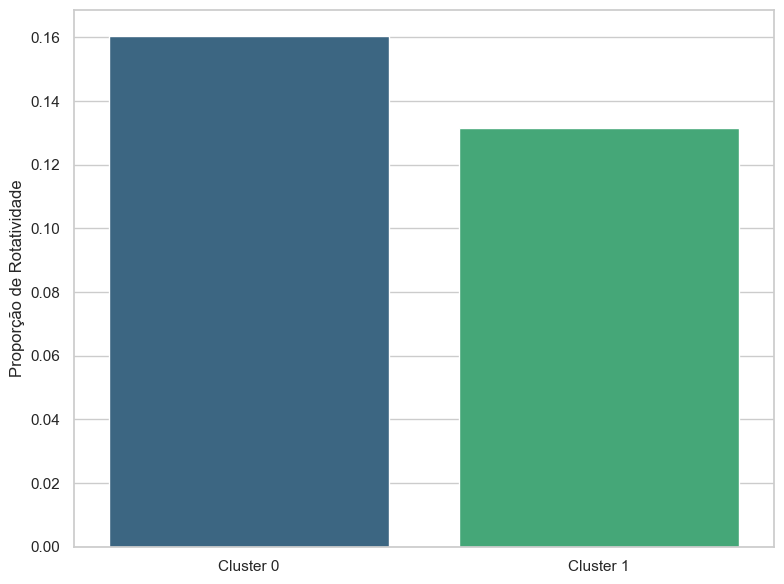

In [40]:
# Calculando a proporção de rotatividade para cada cluster
rotatividade_cluster_0 = df.loc[(df["Clusters"] == 0) & (df["Rotatividade"] == 1)].shape[0] / df.loc[(df["Clusters"] == 0)].shape[0]
rotatividade_cluster_1 = df.loc[(df["Clusters"] == 1) & (df["Rotatividade"] == 1)].shape[0] / df.loc[(df["Clusters"] == 1)].shape[0]

# Criando o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Dados a serem plotados
dados = [rotatividade_cluster_0, rotatividade_cluster_1]
labels_2 = ['Cluster 0', 'Cluster 1']

# Plotando o gráfico de barras
sns.barplot(x=labels_2, y=dados, palette='viridis', ax=ax)

# Adicionando título e rótulos
ax.set_ylabel('Proporção de Rotatividade', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


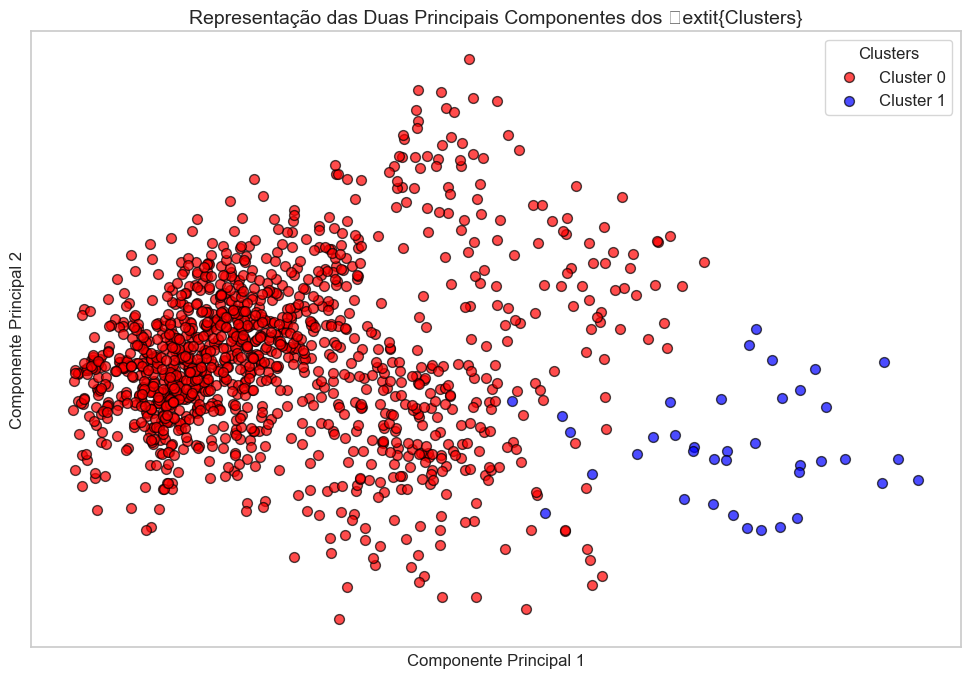

In [41]:
# Aplicando PCA
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(df_scaled)

# Extraindo as componentes principais
x, y = X_PCA[:, 0], X_PCA[:, 1]

# Definição de cores e nomes para os clusters
colors = {0: 'red', 1: 'blue'}
names = {0: 'Cluster 0', 1: 'Cluster 1'}

# Criando DataFrame
df_pca = pd.DataFrame({'x': x, 'y': y, 'label': labels})

# Agrupando por cluster
groups = df_pca.groupby('label')

# Criando figura
fig, ax = plt.subplots(figsize=(12, 8))  # Tamanho ajustado

# Loop para plotar cada cluster separadamente
for name, group in groups:
    ax.scatter(group.x, group.y, s=50, color=colors[name], 
               label=names[name], edgecolors='black', alpha=0.7)

# Ajustes no gráfico
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_title("Representação das Duas Principais Componentes dos \textit{Clusters}", fontsize=14)

# Legenda
ax.legend(title="Clusters", fontsize=12)

# Exibição do gráfico
plt.show()
